<h1>カルフォルニア_住宅価格 回帰分析</h1>
<br>
参考:<br> 
Python】scikit-learnのcalifornia housing datasetを使って回帰分析をしてみる<br>
https://zenn.dev/omochimaru/articles/9b289f4a9455b7 <br>

scikit-learn カリフォルニア住宅価格データの前処理に関する見解<br>
https://qiita.com/kakiuchis/items/fb25c54af77df6e394ca <br>

In [1]:
## 必要なライブラリをインポート
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns

In [2]:
## データの読み込み

housing = fetch_california_housing(as_frame=True)

<h2>データの中身確認</h2>

In [3]:
## 説明変数
housing.data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [4]:
## 目的変数
housing.target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [5]:
#housing.data と housing.targetの結合
housing_all = pd.concat([housing.data, housing.target],axis=1)

<h2>データ概要</h2>

<font size="5">housing.data</font>
<br>
<br>
<font size=3>
<li>Medlnc	    :世帯所得の中央値</li><br>
<li>HouseAge	:住宅の築年数</li><br>
<li>AveRooms	:住宅の部屋数の平均</li><br>
<li>AveBedrms	:住宅の寝室数の平均</li><br>
<li>Poplation	:居住人数の合計</li><br>
<li>AveOcuup	:世帯人数の平均</li><br>
<li>Latitude	:各地区における代表地区の緯度</li><br>
<li>HousePrices	:各地区における代表地区の経度</li><br>
</font>

<font size="5">housing.target</font>
<br>
<br>
<font size=3>
<li>MedHouseVal :カリフォルニア住宅価格</li><br>
</font>

<h2>データクレンジング</h2><br>
<font size="3">
<li>外れ値</li>
<li>欠陥値</li>

などを修正・削除することで信頼性の高いデータにする
</font>

<h3>要約統計量出力</h3>

In [6]:
housing_all.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<h3>要約統計量</h3>
<p>
<font size="3">
count: 要素数<br>
mean : 平均<br>
std  : 標準偏差<br>
min  : 最小値<br>
25%  : 第1四分位数<br>
50%  : 中央値<br>
75%  : 第3四分位数<br>
</font>
</p><br>

<p><font size="5">Q. 要約統計量の値から気づくことは？</font></p>

<h3>データ読み取り</h3>

C:\Users\mitakama\AppData\Local\Temp\ipykernel_12168\1549635412.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  housing_all.hist(bins=20, ax=ax)


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

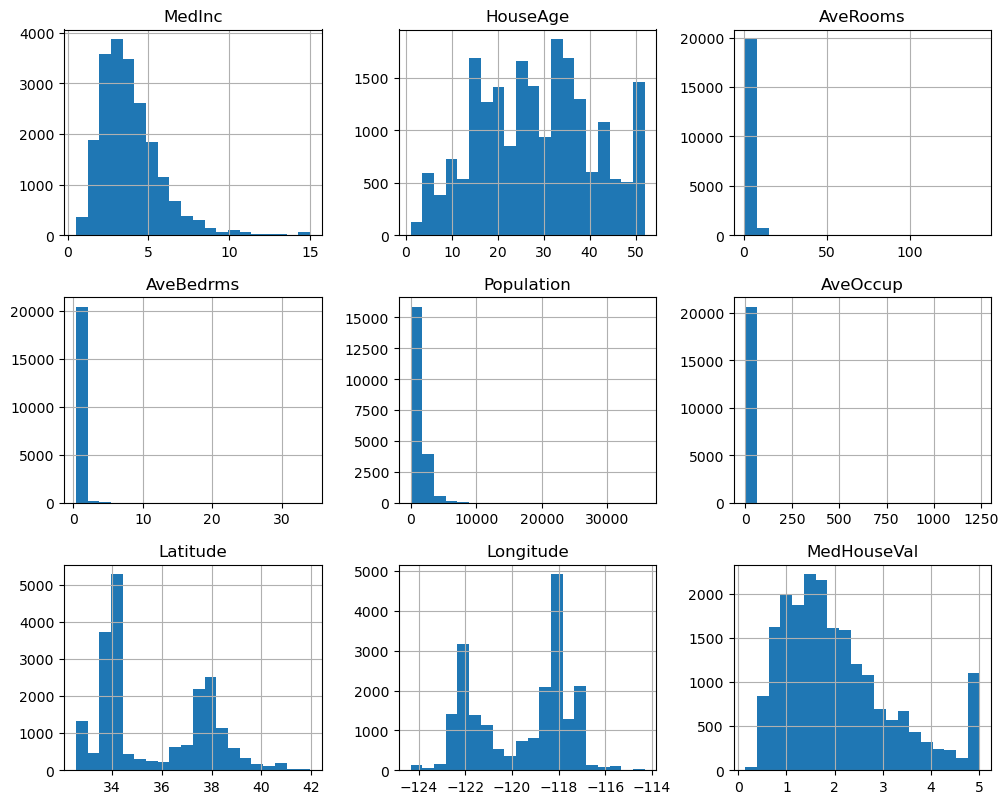

In [7]:
##ヒストグラム出力

fig, ax = plt.subplots(figsize=(10,8))
plt.tight_layout()
housing_all.hist(bins=20, ax=ax)

<p>
<font size="4">大きい値が見づらい</font>
    <br><br>
    <font size="3">
    <li>AveRooms</li>
    <li>AveBedrms</li>
    <li>Population</li>
    <li>AveOccup</li>
    </font>
</p>
    
<p>
<font size="4">最大値に値が集中している</font>
    <br><br>
    <font size="3">
    <li>HouseAge</li>
    <li>MedHouseVal</li>
    </font>

</p>
<br>

<font size="4"> → 各値を確認してみる</font>


<Axes: xlabel='AveRooms', ylabel='AveBedrms'>

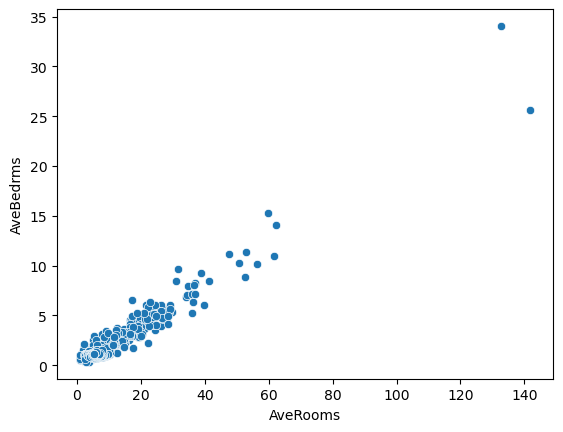

In [8]:
## AveRoomsとAveBedrms

sns.scatterplot(data=housing_all, x='AveRooms', y='AveBedrms')

In [9]:
#外れ値が何を示しているのか調べる

housing_all.query('AveRooms > 100')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


<font size="4">☆google earthを使ってこの場所にどのような住宅があるのか確認してみよう</font><br>

googleEarth > 新規 目印(ピンに+マークがあるボタン) 
<p>> 表示 > 緯度経度入力, 範囲:1000~200m <br>
> 標高 > 「地面に相対」で5m程度　が見やすい
「1914」など分かりやすい名前を付ける
</p>

「場所」タブの作成したピンをダブルクリックで移動できる

<p>
    「レイヤ」タブの「地形」「建物」「境界線や地名」等にチェックマークを入れると様々な情報が見れる
</p>

In [10]:
#AveRooms外れ値を削除
indexNames = housing_all[housing_all["AveRooms"] > 100].index
housing_all.drop(indexNames, inplace=True)

In [11]:
housing_all.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000,20638.000000
mean,3.870731,28.639015,5.416228,1.093889,1425.611687,3.070704,35.631549,-119.569654,2.068438
std,1.899856,12.586076,2.106307,0.377825,1132.434021,10.386551,2.135820,2.003622,1.153828
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563750,18.000000,4.440652,1.006067,787.000000,2.429828,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.228973,1.048780,1166.000000,2.818295,34.260000,-118.490000,1.797000
75%,4.743550,37.000000,6.052120,1.099499,1725.000000,3.282267,37.710000,-118.010000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,1243.333333,41.950000,-114.310000,5.000010


<Axes: ylabel='AveOccup'>

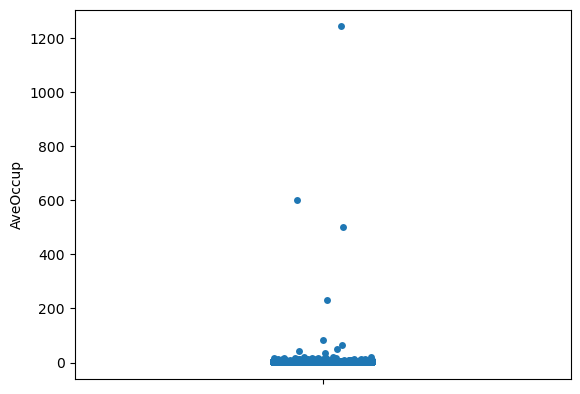

In [12]:
# AveOccup(平均世帯数)
sns.stripplot(data = housing_all['AveOccup'])

In [13]:
housing_all.query('AveOccup > 200')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.675
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.250
16669,4.2639,46.0,9.076923,1.307692,6532.0,502.461538,35.32,-120.70,3.500
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


<p><font size="4">☆google earthで確認</font><p>

In [14]:
indexNames = housing_all[housing_all["AveOccup"] > 200].index
housing_all.drop(indexNames, inplace=True)

In [15]:
housing_all.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.000000,20634.00000,20634.000000
mean,3.870214,28.635892,5.416034,1.093868,1424.682999,2.946473,35.631054,-119.56936,2.068461
std,1.899422,12.585044,2.106203,0.377843,1130.450315,1.221964,2.135579,2.00369,1.153845
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.35000,0.149990
25%,2.562800,18.000000,4.440652,1.006067,787.000000,2.429649,33.930000,-121.80000,1.196000
50%,3.534600,29.000000,5.228973,1.048780,1166.000000,2.818016,34.260000,-118.49000,1.797000
75%,4.742600,37.000000,6.052015,1.099486,1724.000000,3.282006,37.710000,-118.01000,2.647000
max,15.000100,52.000000,62.422222,15.312500,35682.000000,83.171429,41.950000,-114.31000,5.000010


<Axes: ylabel='Population'>

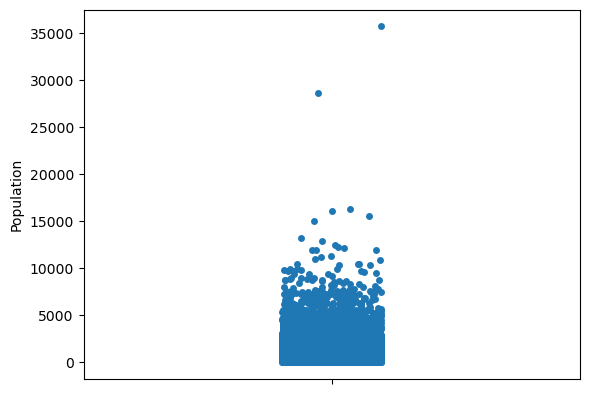

In [16]:
sns.stripplot(data = housing_all['Population'])

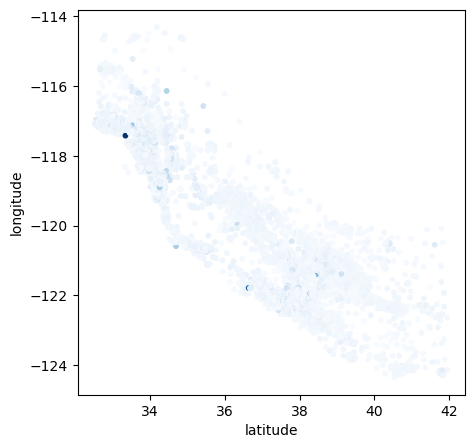

In [17]:
#緯度経度と人口の関係
fig, ax = plt.subplots(1,1,figsize=(5,5), dpi=100)

cmap = cm.Blues
norm = mpl.colors.Normalize(vmin=housing_all["Population"].min(), vmax=housing_all["Population"].max())

ax.set_xlabel("latitude")
ax.set_ylabel("longitude")

ax.scatter(housing.data["Latitude"], housing.data["Longitude"],s=10,
          color = mpl.cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(housing.data["Population"]))

In [18]:
housing_all.query('Population > 25000')

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
9880,2.3087,11.0,5.364518,1.059684,28566.0,4.696810,36.64,-121.79,1.188
15360,2.5729,14.0,5.270497,1.010484,35682.0,7.482072,33.35,-117.42,1.344


<p><font size="4">☆google earthで確認</font><p>

<p>
    <font size="3">Q. 沿岸部 or 内陸部 の指標 を追加するにはどうすればよいか?</font>
</p>

In [19]:
##カルフォルニアの地形から、緯度+経度が大きい(北東方向)ほど内陸、小さい(南西方向)ほど沿岸として近似できる

housing_all["latlon_sum"] = housing_all["Latitude"]+ housing_all["Longitude"]

housing_all

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,latlon_sum
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,-84.35
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,-84.36
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,-84.39
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,-84.40
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,-84.40
...,...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781,-81.61
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771,-81.72
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923,-81.79
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847,-81.89


Text(0, 0.5, 'MedHouseVal')

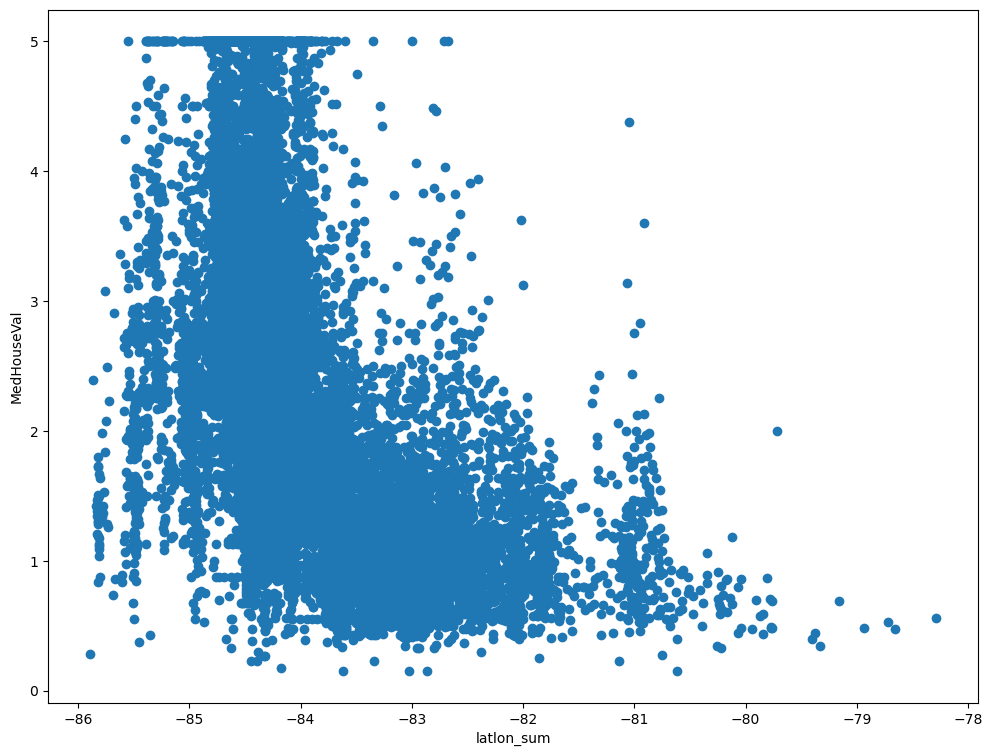

In [20]:
plt.figure(figsize=(12, 9))
plt.scatter(housing_all["latlon_sum"], housing_all["MedHouseVal"])
plt.xlabel("latlon_sum")
plt.ylabel("MedHouseVal")

Text(0, 0.5, 'MedHouseVal')

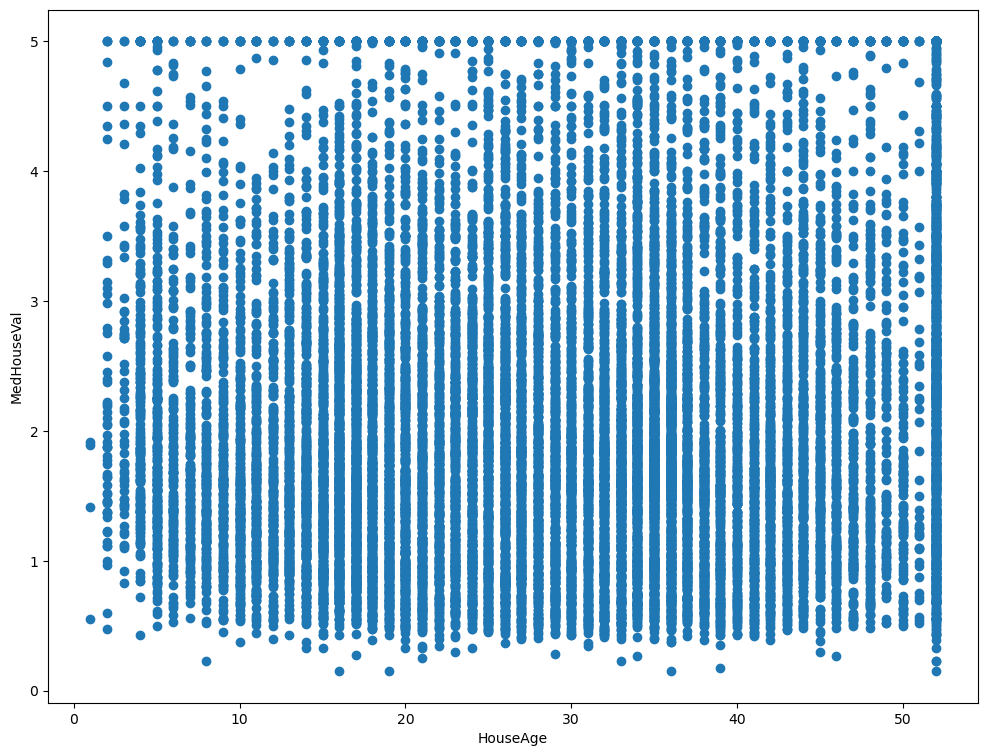

In [21]:
## 値が最大値に集中している項目
# HouseAge
# MedHouseVal

plt.figure(figsize=(12, 9))
plt.scatter(housing_all['HouseAge'], housing_all['MedHouseVal'])
plt.xlabel('HouseAge')
plt.ylabel('MedHouseVal')
#plt.savefig('california_housing_scatter.png')

In [22]:
val_max = housing_all['MedHouseVal'].max()
indexNames = housing_all[housing_all['MedHouseVal'] == val_max].index
housing_all.drop(indexNames, inplace=True)

In [23]:
age_max = housing_all['HouseAge'].max()
indexNames = housing_all[housing_all['HouseAge'] == age_max].index
housing_all.drop(indexNames, inplace=True)

In [24]:
housing_all.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,latlon_sum
count,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000,18568.000000
mean,3.692731,26.980989,5.380043,1.096668,1469.728134,2.982817,35.592667,-119.484642,1.896098,-83.891975
std,1.569404,11.431122,2.143640,0.395735,1161.424468,1.207102,2.147429,1.980954,0.957882,0.827176
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.300000,0.149990,-85.890000
25%,2.537150,17.000000,4.430211,1.005803,811.000000,2.469421,33.920000,-121.550000,1.154000,-84.400000
50%,3.467150,27.000000,5.208816,1.048305,1203.000000,2.855760,34.240000,-118.450000,1.712000,-84.150000
75%,4.615100,36.000000,5.989149,1.099186,1780.000000,3.320230,37.670000,-117.970000,2.432250,-83.430000
max,15.000100,51.000000,62.422222,15.312500,35682.000000,83.171429,41.950000,-114.310000,5.000000,-78.290000


<h2>相関関係</h2>

<Axes: >

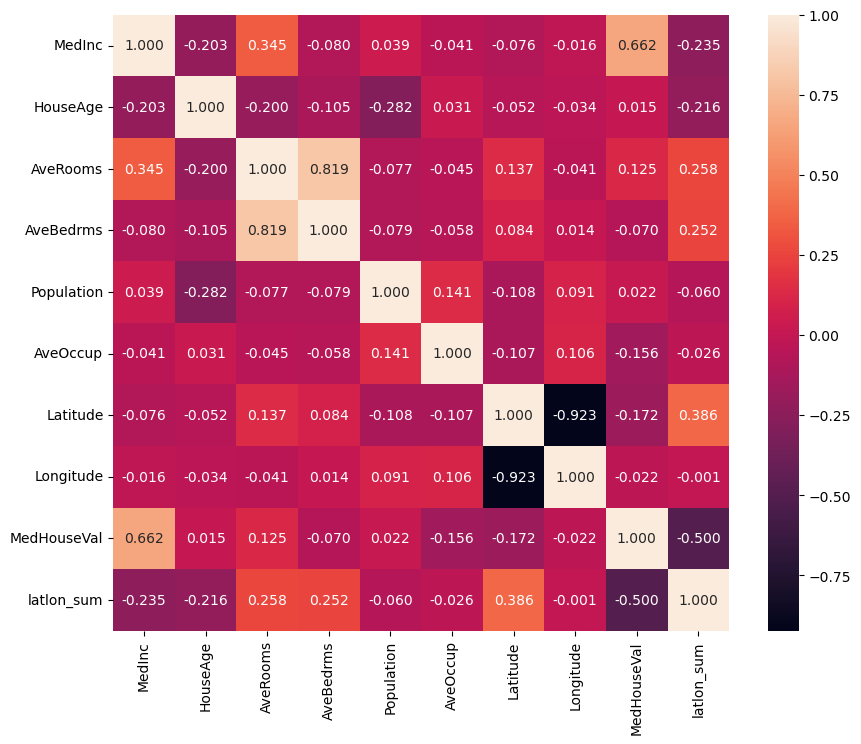

In [25]:
#相対係数のヒートマップ
plt.figure(figsize=(10, 8))
sns.heatmap(housing_all.corr(), annot=True, fmt='.3f',square=True)

<h2>単回帰分析</h2>

In [26]:
#説明変数と目的変数の指定

data = housing_all

exp_var = 'MedInc' # 説明変数
tar_var = 'MedHouseVal' # 目的変数

In [27]:
# 説明変数と目的変数にデータを分割
X = data[[exp_var]]
print(data.shape)
display(X.head())
y = data[[tar_var]]
print(y.shape)
display(y.head())

(18568, 10)


,MedInc
0,8.3252
1,8.3014
8,2.0804
15,2.1250
18,1.9911


(18568, 1)


,MedHouseVal
0,4.526
1,3.585
8,2.267
15,1.400
18,1.587


In [28]:
# 学習
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [29]:
# 精度の確認
print('回帰直線の切片', model.intercept_[0])
print('回帰係数', model.coef_[0][0])
print('決定係数', model.score(X, y))
print('回帰直線', 'y = ', model.coef_[0][0], 'x + ', model.intercept_[0])

回帰直線の切片 0.4048543993009577
回帰係数 0.40383219705632767
決定係数 0.43777178991451327
回帰直線 y =  0.40383219705632767 x +  0.4048543993009577


In [30]:
model.predict(X)

array([[3.76683821],
       [3.757227  ],
       [1.2449869 ],
       ...,
       [1.09136913],
       [1.15888988],
       [1.36944799]])

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


C:\Users\mitakama\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'california_housing_regression')

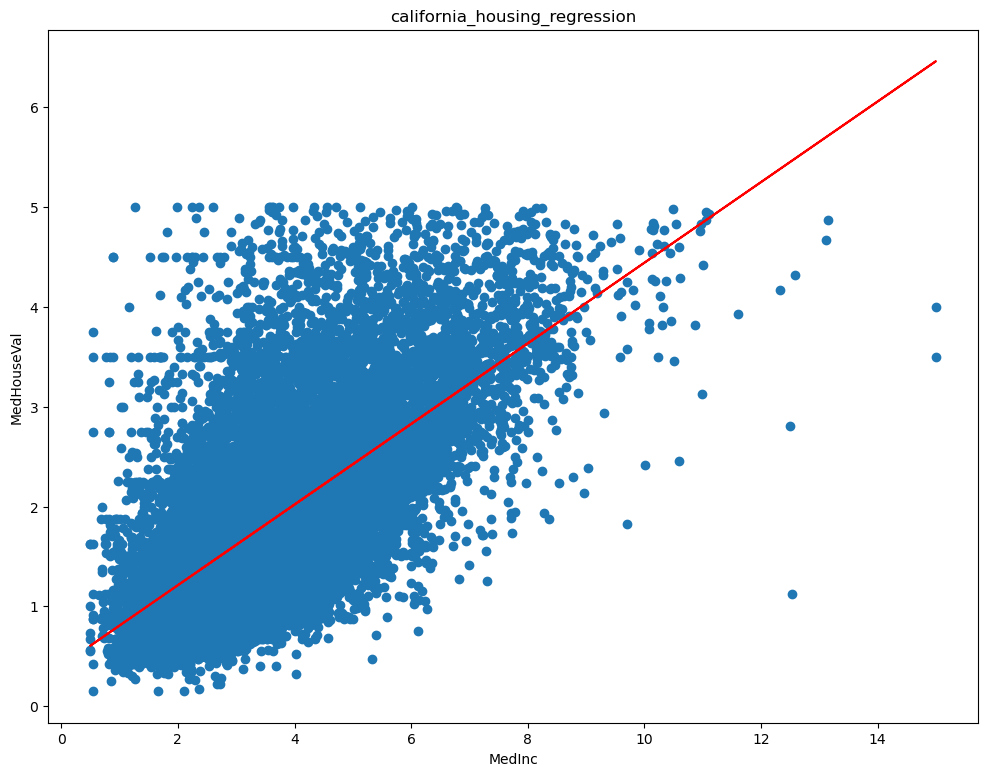

In [31]:
# 回帰直線と散布図を表示

print(type(X))


X = X.values

print(type(X))

plt.figure(figsize=(12, 9))
plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')
plt.xlabel(exp_var)
plt.ylabel(tar_var)
plt.title('california_housing_regression')
#plt.savefig('california_housing_regression.png')

<h2>重回帰分析</h2>

In [32]:
data = housing_all.copy()

In [33]:
# 説明変数
exp_vars = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude','latlon_sum']
#exp_vars = ['MedInc', 'HouseAge', 'AveRooms', 'latlon_sum']
# 目的変数
tar_var = "MedHouseVal"

In [34]:
#欠陥値の有無確認
housing_all.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
latlon_sum     0
dtype: int64

Text(0, 0.5, 'MedHouseVal')

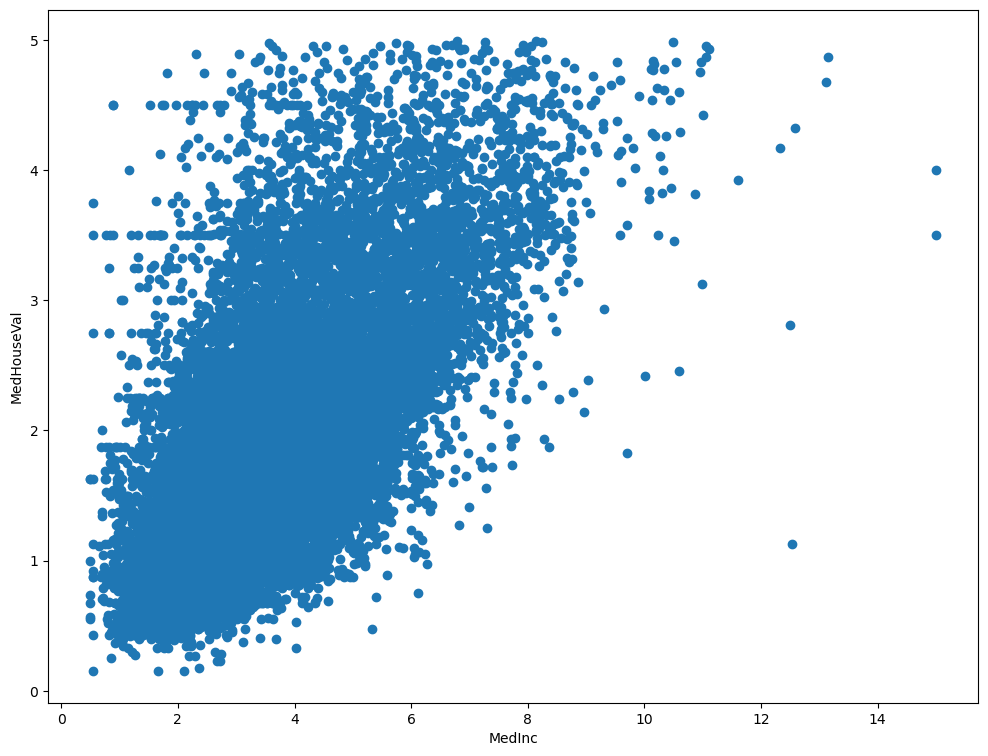

In [35]:
# 住宅価格の外れ値を除去 
exp_var = 'MedInc'
tar_var = 'MedHouseVal' 

val_max = data["MedHouseVal"].max()
indexNames = data[data["MedHouseVal"] == val_max].index
data.drop(indexNames, inplace=True)

plt.figure(figsize=(12, 9))
plt.scatter(data[exp_var], data[tar_var])
plt.xlabel(exp_var)
plt.ylabel(tar_var)

Text(0, 0.5, 'MedHouseVal')

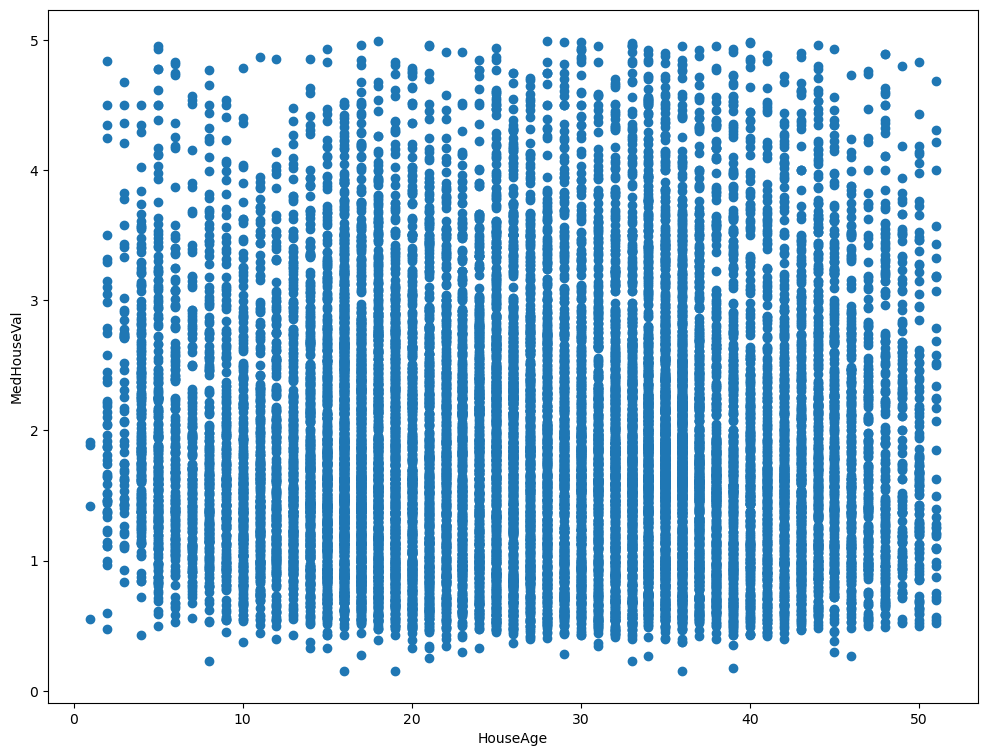

In [36]:
exp_var = 'HouseAge'
tar_var = 'MedHouseVal' 

plt.figure(figsize=(12, 9))
plt.scatter(data[exp_var], data[tar_var])
plt.xlabel(exp_var)
plt.ylabel(tar_var)

Text(0, 0.5, 'MedHouseVal')

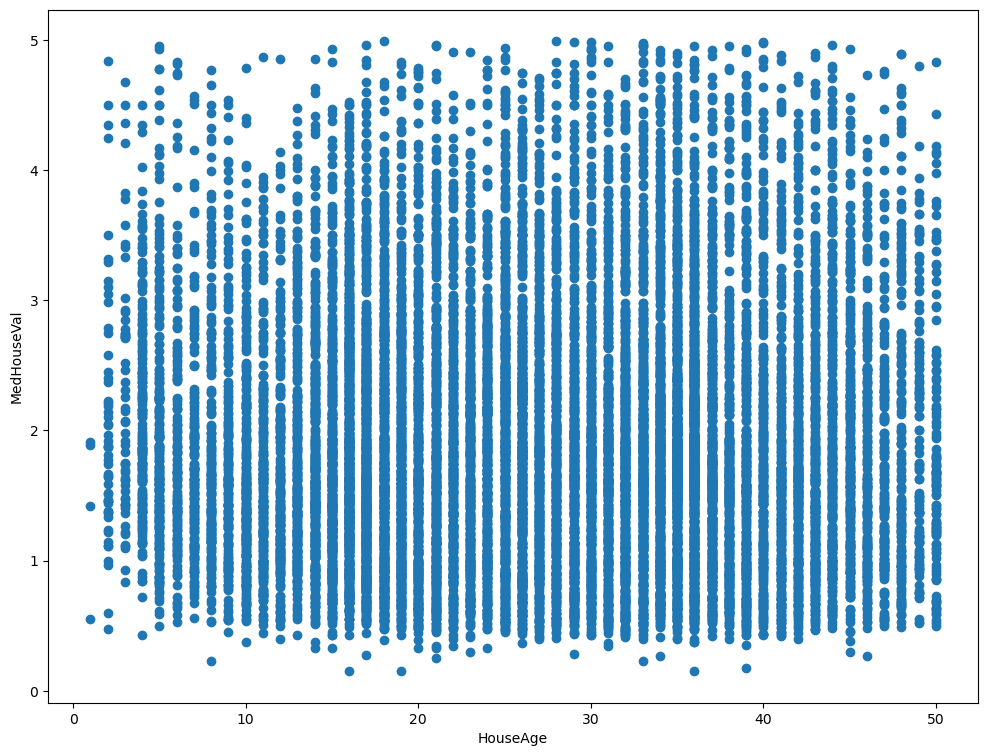

In [37]:
#築年数の外れ値を除去
age_max = data["HouseAge"].max()
indexNames = data[data["HouseAge"] == age_max].index
data.drop(indexNames, inplace=True)

plt.figure(figsize=(12, 9))
plt.scatter(data[exp_var], data[tar_var])
plt.xlabel(exp_var)
plt.ylabel(tar_var)

In [38]:
# 説明変数と目的変数にデータを分割
X = data[exp_vars]
print(data.shape)
display(X.head())
y = data[[tar_var]]
print(y.shape)
display(y.head())
y = data[[tar_var]]
print(y.shape)
display(y.head())
# 訓練データとテストデータに分割
# 分割のためのモジュールをインポート
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.2, random_state=0)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', len(X_test))
print('y_test', len(y_test))

(18507, 10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,latlon_sum
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,-84.35
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,-84.36
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,-84.42
15,2.1250,50.0,4.242424,1.071970,697.0,2.640152,37.85,-122.26,-84.41
18,1.9911,50.0,5.343675,1.085919,990.0,2.362768,37.84,-122.26,-84.42


(18507, 1)


,MedHouseVal
0,4.526
1,3.585
8,2.267
15,1.400
18,1.587


(18507, 1)


,MedHouseVal
0,4.526
1,3.585
8,2.267
15,1.400
18,1.587


X_train (14805, 9)
y_train (14805, 1)
X_test 3702
y_test 3702


In [39]:
#  X_trainを標準化する
# 標準化ライブラリをインポート
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train_scaled', X_train_scaled.shape)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = exp_vars)
display(X_train_scaled.head())

X_train_scaled (14805, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,latlon_sum
0,-0.957055,0.880937,-0.827219,-0.541964,-0.826430,1.714745,-0.718153,0.876389,0.230684
1,1.340811,0.002433,0.913663,-0.189540,0.008483,0.018484,-0.843573,0.846120,-0.167524
2,1.169488,-0.436819,0.374399,-0.268821,-0.218756,0.187510,-1.354543,1.264844,-0.493331
3,-0.435115,1.232338,0.134935,-0.104630,-0.243438,-0.193098,-1.219833,1.991305,1.594245
4,-0.807100,1.144488,-0.530121,-0.197863,-0.345568,0.224144,-0.736734,0.689729,-0.264060


In [40]:
# 学習
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [41]:
# 予測値を計算
y_pred = model.predict(X_train_scaled)
y_pred[:10]

# 偏回帰係数を計算 
for xi, wi in zip(exp_vars, model.coef_[0]):
    print('{0:7s}: {1:6.3f}'.format(xi, wi))

MedInc :  0.671
HouseAge:  0.076
AveRooms: -0.222
AveBedrms:  0.247
Population:  0.025
AveOccup: -0.142
Latitude: 4226472809424.375
Longitude: 3891622122432.862
latlon_sum: -1626988483362.745


In [42]:
# 決定係数
print('決定係数:{:.3f}'.format(model.score(X_train_scaled, y_train)))

from sklearn.metrics import mean_squared_error

# 訓練データに対する Mean Squared Error (MSE)
mse_train = mean_squared_error(y_train, y_pred)
print("訓練データに対するMSE: {:.3f}".format(mse_train))

# テストデータに対する MSE
X_test_scaled = scaler.transform(X_test) # テストデータを訓練データから得られた平均と標準偏差で標準化
y_test_pred = model.predict(X_test_scaled) # テストデータに対して予測する
mse_test = mean_squared_error(y_test, y_test_pred)
print("テストデータに対するMSE: {:.3f}".format(mse_test))

決定係数:0.606
訓練データに対するMSE: 0.360
テストデータに対するMSE: 0.368


C:\Users\mitakama\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


<h2>タイタニック</h2>

In [43]:
#データの読み込み
df = pd.read_csv('./input/titanic3.csv')

In [44]:
#ラベルエンコーディング
df_copy =df.copy()

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() #ラベルエンコーダのインスタンスを作成

df_copy['sex'] = le.fit_transform(df_copy['sex']) #エンコーディング
df_copy['embarked'] = le.fit_transform(df_copy['embarked'])
df_copy.head()

df_copy['embarked']

0       2
1       2
2       2
3       2
4       2
       ..
1304    0
1305    0
1306    0
1307    0
1308    2
Name: embarked, Length: 1309, dtype: int32

In [45]:
#欠損値確認
df_copy.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [46]:
#欠損値保管
df_copy['age'] = df_copy['age'].fillna(df_copy['age'].mean()) #欠損値にageの平均値で補完
df_copy['fare'] = df_copy['fare'].fillna(df_copy['fare'].mean()) #欠損値にfareの平均値で補完
print(df_copy.isnull().sum())

pclass          0
survived        0
name            0
sex             0
age             0
sibsp           0
parch           0
ticket          0
fare            0
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64


In [47]:
#不要列の削除
df_copy = df_copy.drop(['name', 'ticket', 'cabin', 'boat', 'body', 'home.dest'],axis=1)
df_copy

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1,1,0,29.000000,0,0,211.3375,2
1,1,1,1,0.920000,1,2,151.5500,2
2,1,0,0,2.000000,1,2,151.5500,2
3,1,0,1,30.000000,1,2,151.5500,2
4,1,0,0,25.000000,1,2,151.5500,2
...,...,...,...,...,...,...,...,...
1304,3,0,0,14.500000,1,0,14.4542,0
1305,3,0,0,29.881138,1,0,14.4542,0
1306,3,0,1,26.500000,0,0,7.2250,0
1307,3,0,1,27.000000,0,0,7.2250,0


In [48]:
# ndarray形式への変換

features = df_copy[['pclass','age','sex','fare','embarked']].values
#features = df_copy[['age','sex','fare']].values
target = df_copy['survived'].values

In [49]:
# 学習データとテストデータに分割

from sklearn.model_selection import train_test_split

(features , test_X , target , test_y) = train_test_split(features, target , test_size = 0.3 , random_state = 0)

In [50]:
#学習の実行

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,random_state=0) # ランダムフォレストのインスタンスを作成

model.fit(features,target) # 学習の実行

RandomForestClassifier(random_state=0)

In [51]:
# 予測の実行
pred = model.predict(test_X)

In [52]:
# 【98】予測精度の確認
from sklearn.metrics import accuracy_score

accuracy_score(pred,test_y)

0.7888040712468194

In [53]:
# 重要度の確認
# 学習における各列(特徴量)の
# 重要度を表示

importance = model.feature_importances_ 

print('Feature Importances:')
for i, feat in enumerate(['pclass','age','sex','fare','embarked']):
#for i, feat in enumerate(['age','sex','fare']):
    print('\t{0:20s} : {1:>.5f}'.format(feat, importance[i]))

Feature Importances:
	pclass               : 0.08893
	age                  : 0.28727
	sex                  : 0.27940
	fare                 : 0.31417
	embarked             : 0.03023


In [54]:

df_pred = pd.DataFrame(pred)
df_pred.to_csv('./output/submission.csv',header=None)